In [1]:
import pandas as pd
import numpy as np
import nltk
# nltk.download()
nltk.download('punkt')
#Downloading stopwords
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.help.upenn_tagset()
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhartibulchandani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhartibulchandani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bhartibulchandani/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/bhartibulchandani/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [2]:
true_df = pd.read_csv("True.csv")

In [3]:
fake_df = pd.read_csv("Fake.csv")

In [4]:
true_df.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [5]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true_df["subject"].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [7]:
fake_df["subject"].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [8]:
true_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
fake_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
true_df["label"] = 1
fake_df["label"] = 0

In [11]:
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [12]:
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
df = pd.concat([true_df, fake_df]).reset_index(drop=True)

In [14]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [15]:
# fake = 0 ; real = 1
df["label"].value_counts()

0    23481
1    21417
Name: label, dtype: int64

In [16]:
df.shape

(44898, 5)

In [17]:
df_copy = df.copy()

In [18]:
df_copy.shape

(44898, 5)

In [19]:
df_copy["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [22]:
df_copy["news"] = df_copy["title"] + ' ' + df_copy["text"]
df_copy.head()

,title,text,subject,date,label,news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


In [23]:
# function to preprocess data in column data
lemma = WordNetLemmatizer()

def data_preprocess(text):
    relevant_text = []
    for token in simple_preprocess(text):
        if (token not in STOPWORDS) and (token not in stopwords.words('english')):
            relevant_text.append(lemma.lemmatize(token))
    return relevant_text

In [24]:
df_copy["relevant_news"] = df_copy["news"].apply(data_preprocess)

In [25]:
df_copy["relevant_news"][0]

['budget',
 'fight',
 'loom',
 'republican',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cut',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'republican',
 'representative',
 'mark',
 'meadow',
 'speaking',
 'cbs',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmaker',
 'bracing',
 'battle',
 'january',
 'return',
 'holiday',
 'wednesday',
 'lawmaker',
 'begin',
 'trying',
 'pas',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issue',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaign',
 'approach',
 'republican',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republican',
 'want',
 'big',
 'budget',
 'increase',
 'military',
 'spending',
 'democrat',
 '

In [26]:
df_copy.head()

,title,text,subject,date,label,news,relevant_news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, loom, republican, flip, fiscal..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruit, monda..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, let, mr, mueller..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...,"[fbi, russia, probe, helped, australian, diplo..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...,"[trump, want, postal, service, charge, amazon,..."


In [27]:
unique_words = []
for i in df_copy['relevant_news']:
    for j in i:
        unique_words.append(j)

In [28]:
len(unique_words)

9879257

In [29]:
updated_unique_words = list(set(unique_words))

In [30]:
len(updated_unique_words)

106325

In [31]:
df_copy["updated_relevant_news"] = df_copy["relevant_news"].apply(lambda x: " ".join(x))

In [32]:
df_copy.head()

,title,text,subject,date,label,news,relevant_news,updated_relevant_news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, loom, republican, flip, fiscal...",budget fight loom republican flip fiscal scrip...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruit, monda...",military accept transgender recruit monday pen...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, let, mr, mueller...",senior republican senator let mr mueller job w...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...,"[fbi, russia, probe, helped, australian, diplo...",fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...,"[trump, want, postal, service, charge, amazon,...",trump want postal service charge amazon shipme...


In [33]:
df_copy.sample(5)

,title,text,subject,date,label,news,relevant_news,updated_relevant_news
10398,Exclusive: House Speaker Ryan seeks halt to pr...,WASHINGTON (Reuters) - House Speaker Paul Ryan...,politicsNews,"March 10, 2016",1,Exclusive: House Speaker Ryan seeks halt to pr...,"[exclusive, house, speaker, ryan, seek, halt, ...",exclusive house speaker ryan seek halt preside...
31838,GRASSLEY DEMANDS ANSWERS ON TRUMP JR SETUP: Ru...,Republican Senator Charles Grassley wants answ...,politics,"Jul 12, 2017",0,GRASSLEY DEMANDS ANSWERS ON TRUMP JR SETUP: Ru...,"[grassley, demand, answer, trump, jr, setup, r...",grassley demand answer trump jr setup russian ...
40584,BREAKING: TRUMP Announces “Phenomenal” Tax Cut...,President Donald Trump said his administration...,left-news,"Feb 9, 2017",0,BREAKING: TRUMP Announces “Phenomenal” Tax Cut...,"[breaking, trump, announces, phenomenal, tax, ...",breaking trump announces phenomenal tax cut pl...
15156,Brexit never? Britain can still change its min...,LONDON (Reuters) - Prime Minister Theresa May ...,worldnews,"November 9, 2017",1,Brexit never? Britain can still change its min...,"[brexit, britain, change, mind, say, article, ...",brexit britain change mind say article author ...
13806,Bali airport may stay closed longer than 24 ho...,"DENPASAR, Indonesia (Reuters) - Bali Governor ...",worldnews,"November 27, 2017",1,Bali airport may stay closed longer than 24 ho...,"[bali, airport, stay, closed, longer, hour, am...",bali airport stay closed longer hour amid agun...


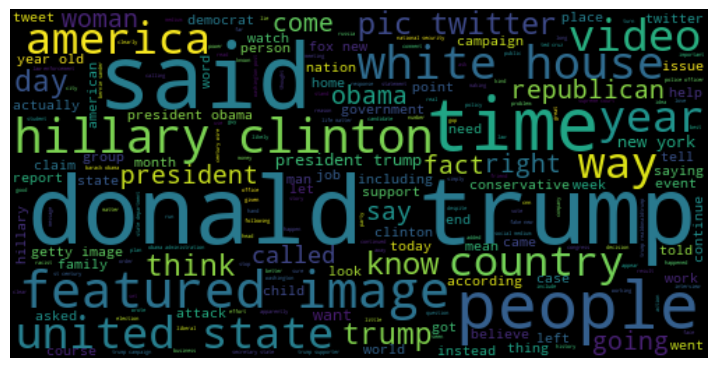

In [34]:
# Word Cloud for fake news
wc_true = WordCloud(width=500, height=250).generate(" ".join(df_copy[df_copy["label"] == 0]["updated_relevant_news"]))
plt.figure(figsize=(9, 5))
plt.imshow(wc_true, interpolation='bilinear')
plt.axis("off")
plt.show()

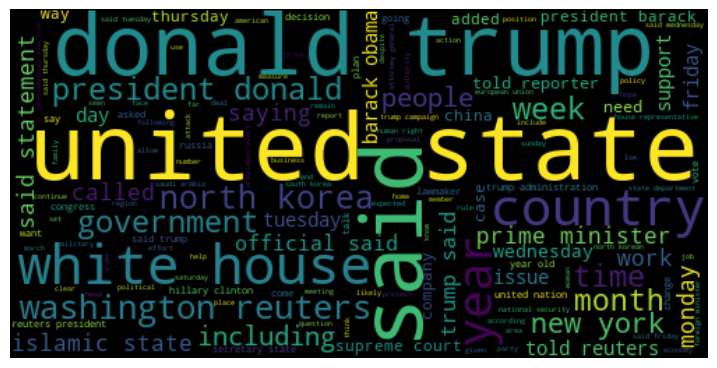

In [35]:
# Word Cloud for true news
wc_true = WordCloud(width=500, height=250).generate(" ".join(df_copy[df_copy["label"] == 1]["updated_relevant_news"]))
plt.figure(figsize=(9, 5))
plt.imshow(wc_true, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
len(df_copy["updated_relevant_news"][0])

3140

In [37]:
X = df_copy["updated_relevant_news"]
y = df_copy["label"]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [40]:
X_train.shape

(28734,)

In [41]:
X_val.shape

(7184,)

In [42]:
X_test.shape

(8980,)

In [43]:
X_train

38147    wow law hillary clinton appears broken video a...
35614    ford ceo tell trump forward plan open billion ...
24030    democratic senator voted confirm career racist...
23096    court slam trump order blocking funding sanctu...
25299    internet hilariously reacts picture trump hide...
                               ...                        
41424    wow mexican need kill donald trump president c...
43956    casting crisis orlando actor agent casualty ro...
44288    russia red line moscow announces end deconflic...
20312    russia lavrov tillerson meet general assembly ...
11651    indian court acquits accused telecom case new ...
Name: updated_relevant_news, Length: 28734, dtype: object

In [44]:
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,2), stop_words="english")

X_train_counts = tfidf_vectorizer.fit_transform(X_train)

In [45]:
X_val_counts = tfidf_vectorizer.transform(X_val)

In [46]:
mnb = MultinomialNB()
mnb.fit(X_train_counts, y_train)

y_val_preds = mnb.predict(X_val_counts)

<Figure size 1000x600 with 0 Axes>

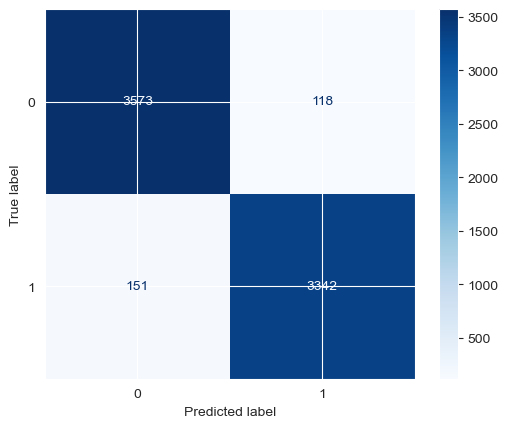

In [159]:
plt.figure(figsize=(10, 6))
conf_matrix = confusion_matrix(y_val, y_val_preds)
cm_display = ConfusionMatrixDisplay(conf_matrix)
cm_display.plot(cmap='Blues')
plt.show()

In [48]:
print(classification_report(y_val, y_val_preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3691
           1       0.97      0.96      0.96      3493

    accuracy                           0.96      7184
   macro avg       0.96      0.96      0.96      7184
weighted avg       0.96      0.96      0.96      7184



In [ ]:
# X_train_counts.todense()[:5]

In [49]:
y_val.value_counts()

0    3691
1    3493
Name: label, dtype: int64

In [50]:
np.unique(y_val_preds, return_counts = True)

(array([0, 1]), array([3724, 3460]))

In [51]:
logreg = LogisticRegression()
logreg.fit(X_train_counts, y_train)

y_val_preds_logreg = logreg.predict(X_val_counts)

<Figure size 1000x600 with 0 Axes>

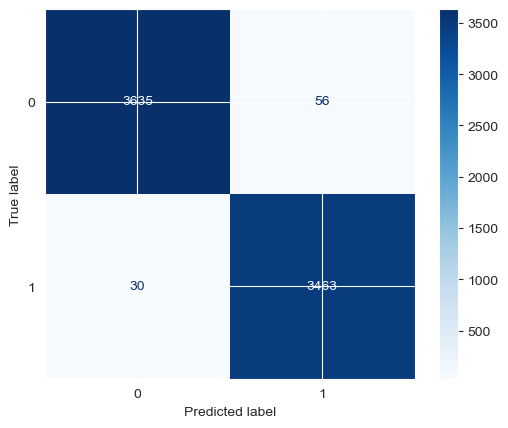

In [160]:
plt.figure(figsize=(10, 6))
conf_matrix_logreg = confusion_matrix(y_val, y_val_preds_logreg)
cm_display_logreg = ConfusionMatrixDisplay(conf_matrix_logreg)
cm_display_logreg.plot(cmap='Blues')
# plt.axis("off")
plt.show()

In [53]:
print(classification_report(y_val, y_val_preds_logreg))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3691
           1       0.98      0.99      0.99      3493

    accuracy                           0.99      7184
   macro avg       0.99      0.99      0.99      7184
weighted avg       0.99      0.99      0.99      7184



In [54]:
np.unique(y_val_preds_logreg, return_counts=True)

(array([0, 1]), array([3665, 3519]))

In [60]:
knc = KNeighborsClassifier()
knc.fit(X_train_counts, y_train)

KNeighborsClassifier()

In [61]:
y_val_preds_knc = knc.predict(X_val_counts)

<Figure size 1000x600 with 0 Axes>

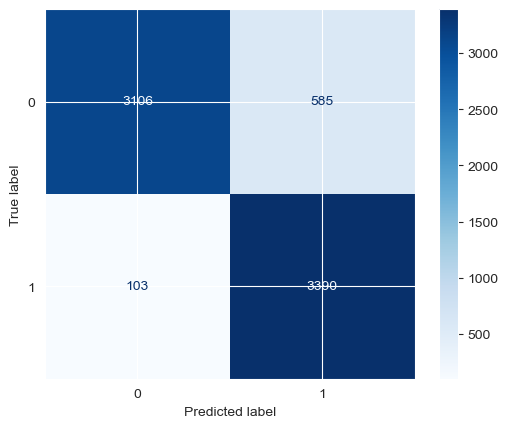

In [161]:
plt.figure(figsize=(10, 6))
conf_matrix_knc = confusion_matrix(y_val, y_val_preds_knc)
cm_display_knc = ConfusionMatrixDisplay(conf_matrix_knc)
cm_display_knc.plot(cmap='Blues')
# plt.axis("off")
plt.show()

In [63]:
print(classification_report(y_val, y_val_preds_knc))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3691
           1       0.85      0.97      0.91      3493

    accuracy                           0.90      7184
   macro avg       0.91      0.91      0.90      7184
weighted avg       0.91      0.90      0.90      7184



In [64]:
np.unique(y_val_preds_knc, return_counts=True)

(array([0, 1]), array([3209, 3975]))

In [55]:
dt = DecisionTreeClassifier()
dt.fit(X_train_counts, y_train)

DecisionTreeClassifier()

In [56]:
y_val_preds_dt = dt.predict(X_val_counts)

<Figure size 1000x600 with 0 Axes>

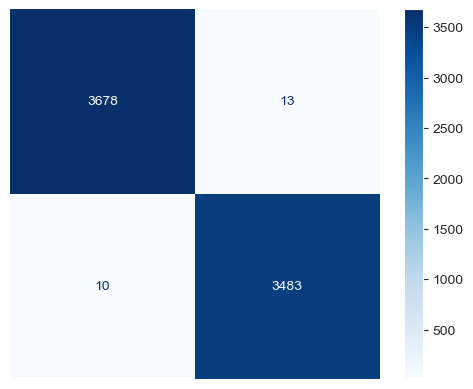

In [138]:
plt.figure(figsize=(10, 6))
conf_matrix_dt = confusion_matrix(y_val, y_val_preds_dt)
cm_display_dt = ConfusionMatrixDisplay(conf_matrix_dt)
cm_display_dt.plot(cmap='Blues')
plt.axis("off")
plt.show()

In [58]:
print(classification_report(y_val, y_val_preds_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3691
           1       1.00      1.00      1.00      3493

    accuracy                           1.00      7184
   macro avg       1.00      1.00      1.00      7184
weighted avg       1.00      1.00      1.00      7184



In [59]:
np.unique(y_val_preds_dt, return_counts=True)

(array([0, 1]), array([3688, 3496]))

In [121]:
X_test_counts = tfidf_vectorizer.transform(X_test)

In [66]:
# testing decision tree and logistic regression models
y_test_preds_logreg = logreg.predict(X_test_counts)

<Figure size 1000x600 with 0 Axes>

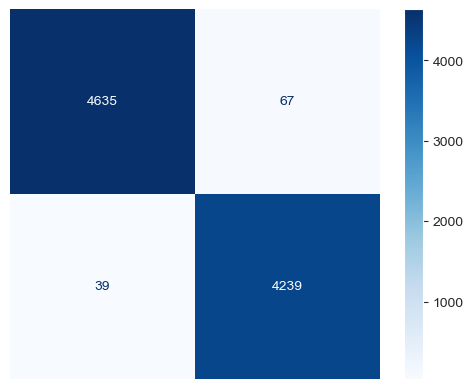

In [142]:
plt.figure(figsize=(10, 6))
conf_matrix_test_logreg = confusion_matrix(y_test, y_test_preds_logreg)
cm_display_test_logreg = ConfusionMatrixDisplay(conf_matrix_test_logreg)
cm_display_test_logreg.plot(cmap='Blues')
plt.axis("off")
plt.show()

In [120]:
X_test_counts = tfidf_vectorizer.transform(X_test)

In [68]:
print(classification_report(y_test, y_test_preds_logreg))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4702
           1       0.98      0.99      0.99      4278

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [122]:
X_test_counts.shape

(8980, 119256)

In [123]:
X_train_counts.shape

(28734, 2674866)

In [127]:
X_val_counts.shape

(7184, 2674866)

In [69]:
y_test_preds_dt = dt.predict(X_test_counts)

<Figure size 1000x600 with 0 Axes>

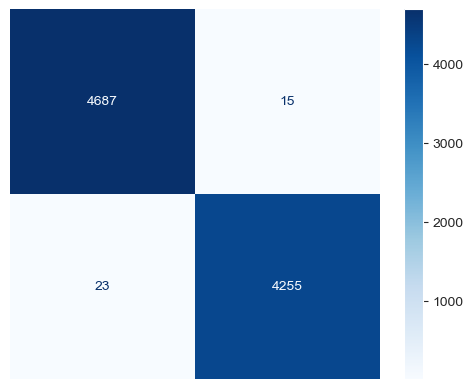

In [136]:
plt.figure(figsize=(10, 6))
conf_matrix_test_dt = confusion_matrix(y_test, y_test_preds_dt)
cm_display_test_dt = ConfusionMatrixDisplay(conf_matrix_test_dt)
cm_display_test_dt.plot(cmap='Blues')
plt.axis("off")
plt.show()

In [71]:
print(classification_report(y_test, y_test_preds_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4702
           1       1.00      0.99      1.00      4278

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [129]:
np.unique(y_test_preds_dt, return_counts=True)

(array([0, 1]), array([4710, 4270]))

In [89]:
test_df = pd.read_csv("test_news.csv")

In [90]:
test_df.head()

,Unnamed: 0,title,url,text,subject,label
0,0,Half of North Korean missile program funded by...,https://edition.cnn.com/2023/05/10/politics/no...,A sweeping US federal government effort ...,politicsNews,1
1,1,Austin lambasts ‘irresponsible’ and ‘unprecede...,https://edition.cnn.com/2023/05/10/politics/ll...,"The letter, sent on May 5 in response to a que...",politicsNews,1
2,2,READ: The charges against Rep. George Santos,https://edition.cnn.com/2023/05/10/politics/ch...,Read the indictment below.\n,politicsNews,1
3,3,E. Jean Carroll says verdict in Trump abuse ca...,https://edition.cnn.com/2023/05/10/politics/e-...,“The old view of the perfect victim was ...,politicsNews,1
4,4,Social Security benefits have lost 36% of buyi...,https://edition.cnn.com/2023/05/10/politics/so...,Those who retired before 2000 have seen ...,politicsNews,1


In [91]:
test_df["news"] = test_df["title"] + " " + test_df["text"]

In [92]:
test_df.head()

,Unnamed: 0,title,url,text,subject,label,news
0,0,Half of North Korean missile program funded by...,https://edition.cnn.com/2023/05/10/politics/no...,A sweeping US federal government effort ...,politicsNews,1,Half of North Korean missile program funded by...
1,1,Austin lambasts ‘irresponsible’ and ‘unprecede...,https://edition.cnn.com/2023/05/10/politics/ll...,"The letter, sent on May 5 in response to a que...",politicsNews,1,Austin lambasts ‘irresponsible’ and ‘unprecede...
2,2,READ: The charges against Rep. George Santos,https://edition.cnn.com/2023/05/10/politics/ch...,Read the indictment below.\n,politicsNews,1,READ: The charges against Rep. George Santos ...
3,3,E. Jean Carroll says verdict in Trump abuse ca...,https://edition.cnn.com/2023/05/10/politics/e-...,“The old view of the perfect victim was ...,politicsNews,1,E. Jean Carroll says verdict in Trump abuse ca...
4,4,Social Security benefits have lost 36% of buyi...,https://edition.cnn.com/2023/05/10/politics/so...,Those who retired before 2000 have seen ...,politicsNews,1,Social Security benefits have lost 36% of buyi...


In [93]:
test_df["news"].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
475    False
476    False
477    False
478    False
479    False
Name: news, Length: 480, dtype: bool

In [94]:
test_df["news"].isna().sum()

6

In [95]:
test_df.dropna(inplace=True)

In [96]:
test_df.isna().sum()

Unnamed: 0    0
title         0
url           0
text          0
subject       0
label         0
news          0
dtype: int64

In [97]:
test_df["news"].isna().sum()

0

In [98]:
test_df["tokenized_news"] = test_df["news"].apply(data_preprocess)

In [100]:
test_df["updated_tokenized_news"] = test_df["tokenized_news"].apply(lambda x: " ".join(x))

In [101]:
test_df.head()

,Unnamed: 0,title,url,text,subject,label,news,tokenized_news,updated_tokenized_news
0,0,Half of North Korean missile program funded by...,https://edition.cnn.com/2023/05/10/politics/no...,A sweeping US federal government effort ...,politicsNews,1,Half of North Korean missile program funded by...,"[half, north, korean, missile, program, funded...",half north korean missile program funded cyber...
1,1,Austin lambasts ‘irresponsible’ and ‘unprecede...,https://edition.cnn.com/2023/05/10/politics/ll...,"The letter, sent on May 5 in response to a que...",politicsNews,1,Austin lambasts ‘irresponsible’ and ‘unprecede...,"[austin, lambasts, irresponsible, unprecedente...",austin lambasts irresponsible unprecedented re...
2,2,READ: The charges against Rep. George Santos,https://edition.cnn.com/2023/05/10/politics/ch...,Read the indictment below.\n,politicsNews,1,READ: The charges against Rep. George Santos ...,"[read, charge, rep, george, santos, read, indi...",read charge rep george santos read indictment
3,3,E. Jean Carroll says verdict in Trump abuse ca...,https://edition.cnn.com/2023/05/10/politics/e-...,“The old view of the perfect victim was ...,politicsNews,1,E. Jean Carroll says verdict in Trump abuse ca...,"[jean, carroll, say, verdict, trump, abuse, ca...",jean carroll say verdict trump abuse case vict...
4,4,Social Security benefits have lost 36% of buyi...,https://edition.cnn.com/2023/05/10/politics/so...,Those who retired before 2000 have seen ...,politicsNews,1,Social Security benefits have lost 36% of buyi...,"[social, security, benefit, lost, buying, powe...",social security benefit lost buying power reti...


In [124]:
X_test_df = test_df["updated_tokenized_news"]
y_test_df = test_df["label"]

In [125]:
X_test_df_counts = tfidf_vectorizer.transform(X_test_df)

In [126]:
X_test_df_counts.shape

(474, 119256)

In [132]:
logreg.fit(X_test_df_counts, y_test_df)
y_test_df_preds_logreg = logreg.predict(X_test_df_counts)

In [133]:
np.unique(y_test_df_preds_logreg, return_counts=True)

(array([0, 1]), array([233, 241]))

In [134]:
y_test_df.shape

(474,)

<Figure size 1000x600 with 0 Axes>

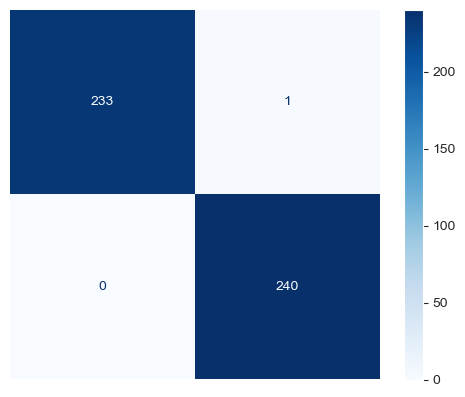

In [143]:
plt.figure(figsize=(10, 6))
conf_matrix_test_df_logreg = confusion_matrix(y_test_df, y_test_df_preds_logreg)
cm_display_test_df_logreg = ConfusionMatrixDisplay(conf_matrix_test_df_logreg)
cm_display_test_df_logreg.plot(cmap='Blues')
plt.axis("off")
plt.show()

In [162]:
print(classification_report(y_test_df, y_test_df_preds_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00       240

    accuracy                           1.00       474
   macro avg       1.00      1.00      1.00       474
weighted avg       1.00      1.00      1.00       474



In [145]:
dt.fit(X_test_df_counts, y_test_df)
y_test_df_dt = dt.predict(X_test_df_counts)

<Figure size 1000x600 with 0 Axes>

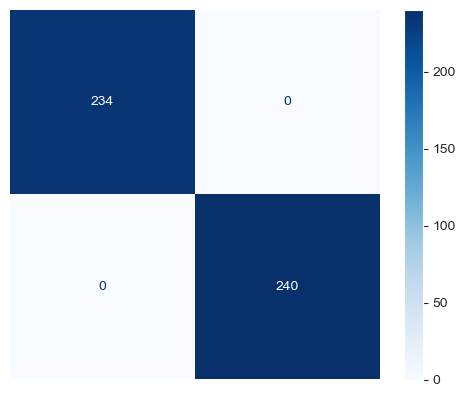

In [146]:
plt.figure(figsize=(10, 6))
conf_matrix_test_df_dt = confusion_matrix(y_test_df, y_test_df_dt)
cm_display_test_df_dt = ConfusionMatrixDisplay(conf_matrix_test_df_dt)
cm_display_test_df_dt.plot(cmap='Blues')
plt.axis("off")
plt.show()

In [147]:
print(classification_report(y_test_df, y_test_df_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00       240

    accuracy                           1.00       474
   macro avg       1.00      1.00      1.00       474
weighted avg       1.00      1.00      1.00       474

